<a href="https://colab.research.google.com/github/PawinData/UC/blob/master/Intra_Region.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import str_to_day, day_to_str, check_missing

In [0]:
# read in raw data
DATA = pd.read_csv("https://raw.githubusercontent.com/PawinData/UC/master/Data_cleaned.csv")

In [0]:
# 10 counties in South California

COUNTIES = ["San Luis Obispo", "Kern", "Santa Barbara", "Ventura", "Los Angeles",
            "Orange", "Riverside", "San Bernardino", "San Diego", "Imperial"]
COUNTIES.sort()

In [24]:
# check if the report of confirmed cases has been incessant in the counties
for cnty in COUNTIES:
    print(cnty, "has no missing data: ", check_missing(DATA.loc[DATA["county"]==cnty]["date"]))

Imperial has no missing data:  True
Kern has no missing data:  True
Los Angeles has no missing data:  True
Orange has no missing data:  True
Riverside has no missing data:  True
San Bernardino has no missing data:  True
San Diego has no missing data:  True
San Luis Obispo has no missing data:  True
Santa Barbara has no missing data:  True
Ventura has no missing data:  True


In [0]:
T = list()
D = dict()

for cnty in COUNTIES:
    data = DATA.loc[DATA["county"]==cnty]
    time = [str_to_day(dd) for dd in data["date"]]
    # record the date when the first case was confirmed in each county
    D[cnty] = time[0]    
    cases_count = list(data["cases"])
    cases_count = [cases_count[0]] + [cases_count[i]-cases_count[i-1] for i in range(1,len(cases_count))]
    if time[0]>1:
        cases_count = [0] * (time[0] - 1) + cases_count
    T.append(cases_count)

# construct an array
# each row is the time series of cases count for a county    
TimeSeries = np.array(T)

In [0]:
# save the array of cases count as a dataframe
DF = pd.DataFrame(TimeSeries, index=COUNTIES, columns=[day_to_str(dd) for dd in range(1,76+1)])
DF.to_csv("Daily_New_Cases.csv", sep=",")

In [14]:
# display the first few columns of the dataframe for daily new cases
DF.loc[:,:"2020-02-02"]

,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,2020-02-01,2020-02-02
Imperial,0,0,0,0,0,0,0,0,0
Kern,0,0,0,0,0,0,0,0,0
Los Angeles,0,1,0,0,0,0,0,0,0
Orange,1,0,0,0,0,0,0,0,0
Riverside,0,0,0,0,0,0,0,0,0
San Bernardino,0,0,0,0,0,0,0,0,0
San Diego,0,0,0,0,0,0,0,0,0
San Luis Obispo,0,0,0,0,0,0,0,0,0
Santa Barbara,0,0,0,0,0,0,0,0,0
Ventura,0,0,0,0,0,0,0,0,0


In [0]:
H = dict()
S = dict()

for row in range(10):               # looping through every county
    for i in range(76):             # for every two days
        for j in range(76):         # compute the |diff| in number of new cases
            delta = abs(i-j)
            if delta==0:
                continue
            H[delta] = H.get(delta,0) + 1    # count records (to compute average)
            # add up total |diff|
            S[delta] = S.get(delta,0) + abs(TimeSeries[row,i] - TimeSeries[row,j])

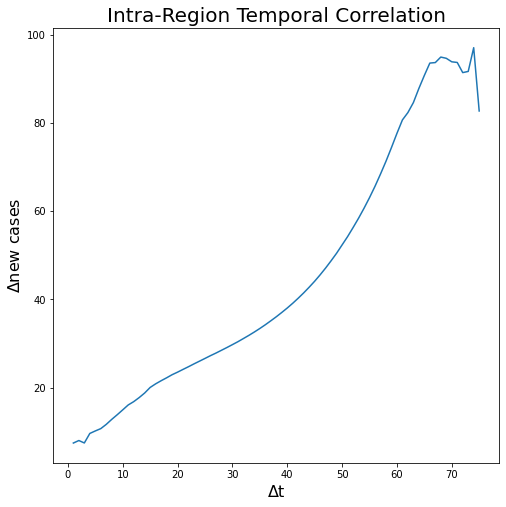

In [20]:
# plot the average |diff| against |delta t|
plt.figure(figsize=(8,8))
plt.plot(list(H.keys()), [int(S[delta])/int(H[delta]) for delta in H.keys()])
plt.title("Intra-Region Temporal Correlation", fontsize=20)
plt.xlabel("$\Delta$t", fontsize=16)
plt.ylabel("$\Delta$new cases", fontsize=16)
plt.savefig("Intra_Region_Tempo.png")
plt.savefig("Intra_Region_Tempo.eps")
plt.show()

# To study intra-region temporal correlation, we show how $|n_t - n_{t+\Delta t}|$ changes with $\Delta t$ on average over all counties. From the figure above, we note that the differences in daily new cases are highly correlated with $\Delta t$. Particularly, two consecutive days share similar numbers of new cases; while as $\Delta t$ increases, the difference tends to grow.



